1. En los grandes aceleradores de partículas se puede producir piones cargados cuando se hace colisionar protones  de gran energía con algún blanco preparado para este fin. Se conoce que los piones tienen una vida media muy corta: $1.77 \times 10^{-8}$ seg. Lo que esto significa es, que una vez que se producen los piones, la mitad de ellos se habrá desintegrado en un tiempo de $1.77 \times 10^{-8}$ seg. 

Los experimentos en el acelerador reflejan el hecho de que la intensidad del haz de piones que emerge del blanco, y que viaja a $0.99 \ c$, se reduce a la mitad una vez que recorren $37.2$ mts. 
Pero sucede que si los piones viajan a $0.99 \ c= 2.968\times 10^8$ m/s cuando estos hayan decaído a la mitad la distancia que habrán recorrido es $d=vt$:

In [1]:
import sympy
from sympy import *
init_printing()

Empezamos definiendo un tensor métrico abstracto 

In [2]:
m, s = symbols('m s')
c = 2.99792458 *10**(8)
d = (0.99*c*(m/s))*(1.77*10**(-8)*s)
d

¿Y entonces por qué el experimento mide que viajaron $37.2$ mts? Bueno, no estamos considerando los efectos relativistas que están contenidas en las transformaciones de Lorentz:
$$
t_2-t_1= ({t'}_2-{t'}_1)\gamma \quad \Rightarrow   \Delta t= \Delta {t'} \gamma \,,
$$
donde $\Delta {t'}$ es el tiempo propio, el tiempo medido por un reloj respecto a la partícula en movimiento, es decir, el sistema de referencia donde el pion se encuentra en reposo. 

Calculemos, primeramente el factor $\gamma$:

In [3]:
γ = 1/sqrt(1-(0.99)**2)
γ

Por lo tanto, la vida media de los piones medida desde el laboratorio es:

In [4]:
Δt = (1.77*10**(-8)*s)*γ
Δt.evalf(3)

Según las personas que miden el experimento, y que están en el sistema en reposo, los piones viven $\approx 1.255 \times 10^{-7}$ s,  y por lo tanto viajan una distancia: $x=(0.99 c) \Delta t$

In [5]:
N(0.99*c*(m/s)*Δt,3)

2. Procederemos ahora a resolver  el sistema que nos condujo a las transformaciones impropias de Lorentz. 

Primero, escribamos una lista que contiene el sistema de ecuaciones:

In [6]:
L11, L01, L00 = symbols('L11 L01 L00')
v, c = symbols('v c' , positive=True)
assuming(c > v)
sis = [Eq(L11**2-c**2*L01**2,1), Eq(L11**2*v+c**2*L01*L00,0), Eq(c**2*L00**2-v**2*L11**2,c**2)]
sis

Es importante defir $v>0$,y  $v<c$, para evitar soluciones complejas. 

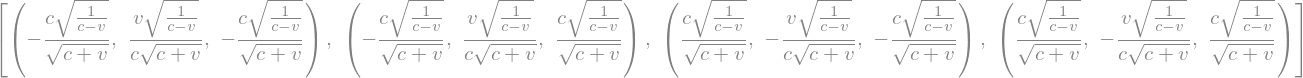

In [7]:
sols =list(solve(sis,(L00, L01, L11)))
sols

3. Existe una librería llamada "pytearcat" para Python que es de código abierto y creado para trabajar con operaciones tensoriales generales, tanto en el campo de la Relatividad General (GR) como en otros que necesitan usar cálculo tensorial. Para mayor información se puede consultar \url{https://github.com/pytearcat/pytearcat}

In [8]:
import pytearcat as pt

Remember that the time coordinate must be the first coordinate.

Dimension = 4
Coordinates = t,x,y,z
Metric defined successfully: 



<IPython.core.display.Math object>

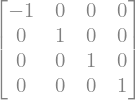

In [9]:
# Se definen las coordenadas
t,x,y,z = pt.coords('t,x,y,z')
# Se definen las funciones y constantes
c = pt.con('c')
Ax = pt.fun('Ax','t,x,y,z')
Ay = pt.fun('Ay','t,x,y,z')
Az = pt.fun('Az','t,x,y,z')
phi = pt.fun('phi','t,x,y,z')
g = pt.metric('ds2 = -dt**2 + (dx**2 + dy**2 + dz**2)')

Construyamos el tensor de Maxwell

In [10]:
Ex = pt.fun('Ex','t,x,y,z')
Ey = pt.fun('Ey','t,x,y,z')
Ez = pt.fun('Ez','t,x,y,z')
Bx = pt.fun('Bx','t,x,y,z')
By = pt.fun('By','t,x,y,z')
Bz = pt.fun('Bz','t,x,y,z')

In [11]:
F_simplified = [[0,-Ex,-Ey,-Ez],[Ex,0,-Bz,By],[Ey,Bz,0,-Bx],[Ez,-By,Bx,0]]
F_simplified

Elements assigned correctly to the ^,^ components


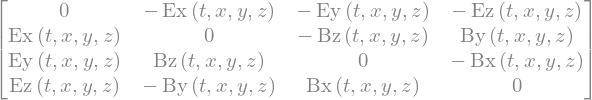

In [12]:
F = pt.ten('F',2)
F.assign(F_simplified,'^,^')
F.display('^,^')

Podemos calcular ${F^{\mu \nu}}_{ ,\nu}=4 \pi J^\mu$

Elements assigned correctly to the ^nu components


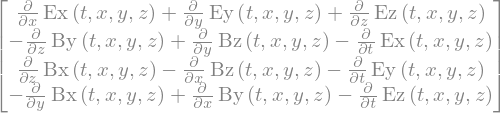

In [13]:
DF = pt.ten('J',1)
DF_dat = pt.D(F('^mu,^nu'),'_mu')
DF.assign(DF_dat,'^nu')
DF.display('^')

Podemos definir un tensor de un solo índice $J$

In [14]:
rho = pt.fun('rho','t,x,y,z')
Jx = pt.fun('Jx','t,x,y,z')
Jy = pt.fun('Jy','t,x,y,z')
Jz = pt.fun('Jz','t,x,y,z')

Elements assigned correctly to the ^ components


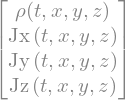

In [15]:
J = pt.ten('J',1)
J_dat = [rho,Jx,Jy,Jz]
J.assign(J_dat,'^')
J.display('^')

Las identidades de Bianchi
$$
\partial_\gamma F_{\mu \nu}+\partial_\mu F_{\nu \gamma}+\partial_\nu F_{\gamma \mu} \equiv F_{\mu \nu, \gamma}+F_{\nu \gamma, \mu}+F_{\gamma \mu, \nu}=0
$$


In [16]:
IB = pt.ten('IB',3)
IB_dat = pt.D(F('_a,_b'),'_c') + pt.D(F('_b,_c'),'_a') + pt.D(F('_c,_a'),'_b')
IB.assign(IB_dat,'_a,_b,_c')
IB.factor()
IB.display()

Elements assigned correctly to the _a,_b,_c components
All components are zero


La $\delta$ de Kronecker $\delta_i^j$ 

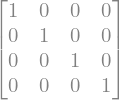

In [17]:
KD = pt.kdelta()
KD.display()

In [18]:
KD("_0,_0")

El símbolo de Levi-Civita

In [19]:
LC = pt.lcivita(convention=-1)
LC("_0,_1,_2,_3")

Con el símbolo de Levi-Civita haremos la siguiente operación
$$
\epsilon_{a b c d} F^{c d}
$$

Elements assigned correctly to the _a,_b components


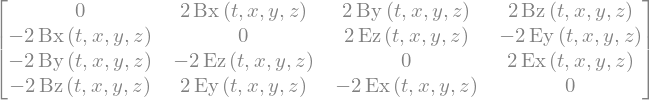

In [20]:
val = pt.ten('val',2)
val_dat= LC('_a,_b,_mu,_nu')*F('^mu,^nu')
val.assign(val_dat,'_a,_b')
val.factor()
val.display('_,_')